# Exploratory Analysis of My Current Running Playlist

Here, we will explore and analyze the data from my running playlist that we extracted and cleaned. Our goal is to identify traits of songs on my current running playlist that might help us choose new songs to add. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plottingfuncs import simple_boxplot, multiple_boxplots

pd.options.display.max_rows = 10
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Let's import the track and genre data that we extracted in the previous notebook.

In [2]:
tracks = pd.read_csv('./running_tracks_clean.csv')
genres = pd.read_csv('./running_genres_clean.csv')

And let's take a first look at the data.

In [3]:
genres

,artist_genres
0,dance pop
1,album rock
2,classic rock
3,mellow gold
4,rock
...,...
428,gangster rap
429,hardcore hip hop
430,hip hop
431,queens hip hop


In [4]:
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,track_pop,name,artist,artist_id
0,0.65,0.95,6,-4.72,1,0.10,0.13,0.00,0.15,0.51,91.91,0dCr3qIupWh36ilLjRHi4P,228333,4,0,Virtual Insanity - Remastered,Jamiroquai,6J7bCzzYhU3gM9j1wd
1,0.73,0.69,11,-7.16,0,0.04,0.04,0.00,0.10,0.81,88.75,4aKIs5t9TqP59btlCGPrgw,271893,4,0,Maneater,Daryl Hall & John Oates,77T1kLj6mCWFNqOmP9H
2,0.52,0.55,6,-13.74,1,0.04,0.50,0.01,0.18,0.91,176.94,4gvea7UlDkAvsJBPZAd4oB,288733,4,75,The Boys Of Summer,Don Henley,5dbuFbH1SJlQhQX9OUJ2
3,0.58,0.83,1,-4.60,1,0.13,0.01,0.00,0.04,0.57,174.03,49FYlytm3dAAraYgpoJZux,275987,4,80,Umbrella,Rihanna,5KCCKE2jJHZ9KAK11H
4,0.54,0.81,0,-5.27,1,0.11,0.06,0.00,0.08,0.53,88.41,0oxxzbHXRNkBHOxayAh49N,228333,4,0,Why Can't This Be Love,Van Halen,2cnMROVqPMq7YFE6K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.65,0.79,11,-7.02,0,0.27,0.01,0.00,0.27,0.58,175.29,6Ah1jYLTaxl8EeRHP0L0tY,243600,4,40,The Predator,Ice Cube,3Mc5XW6E0lY3Uk4cA
77,0.81,0.61,9,-5.91,1,0.19,0.03,0.00,0.04,0.48,91.06,76gJ7ATRkD3WZuYKPl84xm,255627,4,47,Y'All Gone Miss Me,Snoop Dogg,7hJcb94lzcOq3ENPG
78,0.84,0.61,10,-10.68,1,0.22,0.01,0.00,0.56,0.72,91.12,5thts3213xwSroRd11fv5A,296333,4,54,People Everyday - Metamorphosis Mix,Arrested Development,5V9LuEmZxnbk1gMnjMD7
79,0.51,0.82,1,-8.82,0,0.37,0.25,0.00,0.34,0.56,181.80,5mOzvm41Pdh1WOtBKlCtZd,272867,4,47,B.I.B.L.E. (Basic Instructions Before Leaving ...,GZA,6n6XAOw4B0nDUIvAOUO


## I. Genre Analysis

Before diving into audio features, let's take a look at genres. We likely want to limit songs we search for to the genres that I listen to most frequently. Each track in my playlist has a main artist, and each artist has potentially several genres. The genres DataFrame is just a list of each of these genres with one genre per row. Therefore, artists whose songs appear more frequently in the playlist will have genres that appear more frequently in the genres DataFrame. We can count how many times each genre appears in the list and sort this in descending order to get a sense of which genres appear most frequently in the playlist.

In [5]:
pd.options.display.max_rows = 100
genres['artist_genres'].value_counts()

hip hop                       42
rap                           29
east coast hip hop            27
hardcore hip hop              26
conscious hip hop             19
gangster rap                  19
alternative hip hop           18
pop                           17
southern hip hop              13
rock                          12
political hip hop             10
album rock                     9
classic rock                   9
dance pop                      8
hard rock                      7
west coast rap                 7
g funk                         7
philly rap                     7
pop rap                        7
queens hip hop                 6
canadian contemporary r&b      6
canadian pop                   6
art rock                       5
neue deutsche harte            4
neo soul                       4
industrial rock                4
industrial metal               4
industrial                     4
permanent wave                 4
german metal                   4
alternativ

We can see a lot of hip hop on this list! While I grew up playing and listening to a wide variety of genres, I only really got into hip hop music when I started running seriously. Hip hop music usually has a strong beat and a strong sense of flow, which I find really helpful when I am running and trying to maintain a pace.

Let's choose the genres that appear 5 or more times (the top 23) and visualize these in a "Top Genres" bar chart. This gives some variety beyond hip hop but is not too crowded.

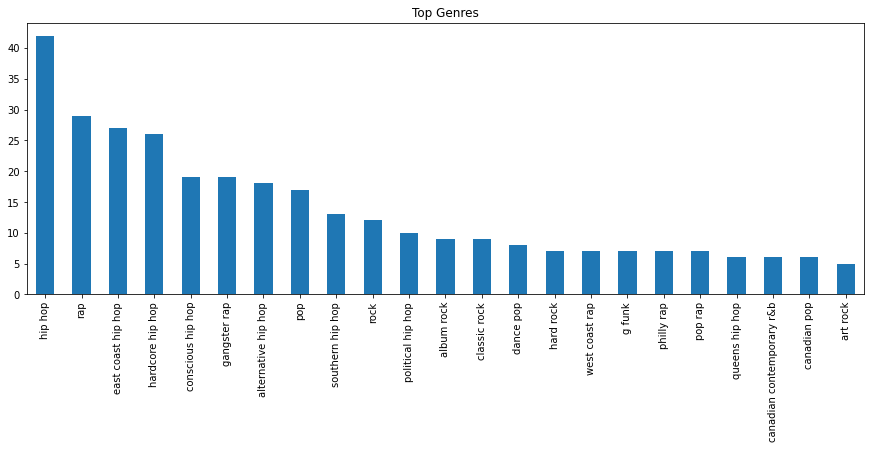

In [6]:
top_genres = genres['artist_genres'].value_counts()[:23]
top_genres.plot(kind='bar', title ="Top Genres", figsize=(15, 5))
plt.show()

Let's export these top genres to a .csv file. We will use these genres later when we search for songs.

In [7]:
top_genres.to_csv('./top_genres.csv')

## II. Artists Analysis

Similar to genres, let's look the artists who appear most frequently in the playlist. We may want to choose more songs from these artists when searching our database.

In [8]:
artists = tracks['artist'].value_counts()
artists

The Roots                  7
The Weeknd                 6
Nas                        6
JAY-Z                      5
Rammstein                  4
Black Star                 3
Sia                        3
Aerosmith                  2
2Pac                       2
Kanye West                 2
Ice Cube                   2
Van Halen                  2
Rihanna                    2
Snoop Dogg                 2
Rush                       1
Led Zeppelin               1
David Guetta               1
ZAYN                       1
The Notorious B.I.G.       1
Frank Ocean                1
Jamiroquai                 1
Peter Gabriel              1
Doja Cat                   1
Jeff Buckley               1
Michael Jackson            1
Geto Boys                  1
Red Hot Chili Peppers      1
Arrested Development       1
AC/DC                      1
Ms. Lauryn Hill            1
J Dilla                    1
The Brothers Johnson       1
Don Henley                 1
Blackstreet                1
Radiohead     

Many artists appear only once, but the top artists appear much more frequently. The Roots, one of my favorite groups, appear 7 times in the 81 song playlist.

Let's create a bar chart of "Top Artists" that includes each artist who appears more than once in the playlist.

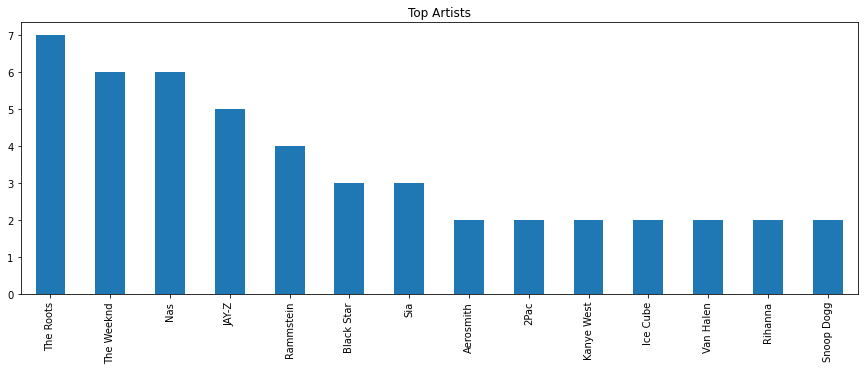

In [9]:
top_artists = tracks['artist'].value_counts()[:14]
top_artists.plot(kind='bar', title="Top Artists", figsize=(15, 5))
plt.show()

As we did with genres, let's export these top artists to a .csv file. While most if not all of this information is likely captured in the genre data, my top artists might also help find relevant songs.

In [10]:
top_artists.to_csv('./top_artists.csv')

## III. Audio Features Analysis

Now let's figure out what kinds of audio features are common in the songs I like. First, let's view the descriptive statistics for the songs on the playlist.

In [11]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
count,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00
mean,0.63,0.70,5.31,-6.65,0.60,0.18,0.13,0.02,0.20,0.53,114.45,260724.85,4.01,50.00
std,0.16,0.15,4.05,2.41,0.49,0.13,0.15,0.08,0.17,0.22,39.05,42663.43,0.11,24.59
min,0.24,0.24,0.00,-13.95,0.00,0.03,0.00,0.00,0.04,0.10,81.47,177120.00,4.00,0.00
25%,0.52,0.61,1.00,-7.74,0.00,0.05,0.01,0.00,0.09,0.39,89.68,229827.00,4.00,39.00
50%,0.65,0.71,6.00,-6.19,1.00,0.14,0.05,0.00,0.14,0.54,92.08,256347.00,4.00,54.00
75%,0.75,0.82,9.00,-5.27,1.00,0.26,0.20,0.00,0.27,0.72,171.00,283227.00,4.00,70.00
max,0.90,0.97,11.00,-2.08,1.00,0.53,0.61,0.50,0.90,0.92,189.51,405213.00,5.00,89.00


This table contains a lot of interesting information. For example, songs on my running playlist tend to have both high danceability and high energy, and the overall instrumentalness is very low. However, this table is also a bit difficult to read. It would be easier to visualize the distributions of these different features using box plots. 

### 1. Danceability, Energy, Speechiness, Acousticness, Liveness, and Valence

First, let's look at danceability, energy, speechiness, acousticness, liveness, and valence. These all have values that range from 0 to 1. The Spotify documentation [1] describes these features in the following way:

* <b>Danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* <b>Energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* <b>Speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* <b>Acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* <b>Liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* <b>Valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

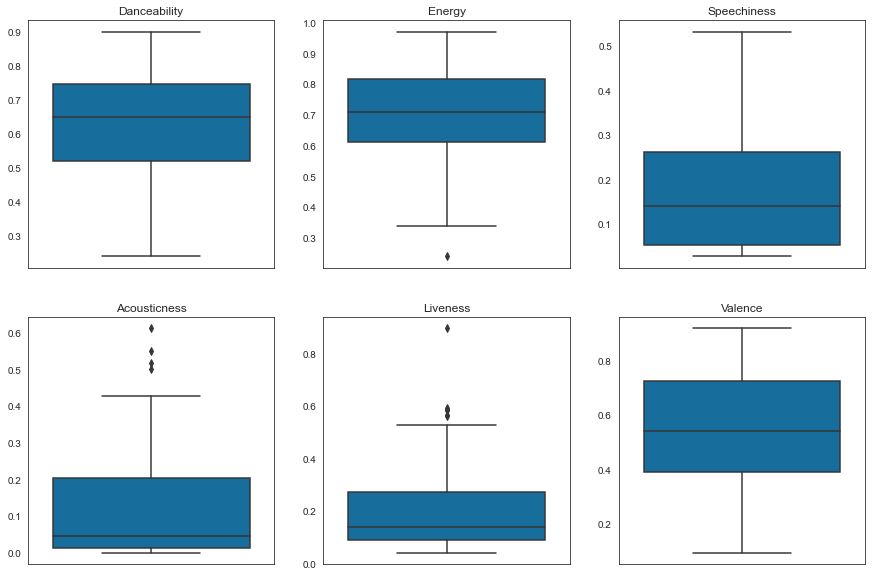

In [12]:
sns.set_style('white')
sns.set_palette('colorblind')

cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']
multiple_boxplots(tracks, cols, 2, 3, (15, 10))
plt.show()

As noted above, the tracks I listen to while running tend to be more danceable and higher energy, which makes a lot of sense for a running playlist. While these attributes have a wide range, these tracks have a 25th percentile danceability score of 0.52 and a 25th percentile energy score of 0.61. These tracks also have low speechiness and acousticness scores, with a 75th percentile speechiness score of 0.26 and a 75th percentile acousticness score of 0.20. 

While these tracks have a 75th percentile liveness score of 0.27, I do not see this as being a significant factor in making a playlist. I would guess that most music on Spotify is not recorded live anyway, and I wouldn't want to exclude great live tracks, which can be even better than the originals.

The valence data is interesting. While I would have expected the tracks on a running playlist to be mostly positive, it seems like a fairly even split between positive and negative, with a median slightly on the positive side at 0.54. It's possible that a variety of emotions in the songs I listen to on a run just makes it more interesting. Still, I'd prefer to add more songs that are positive overall, so we might want to limit valence on the low side to the 25th percentile, which is 0.39.

### 2. Instrumentalness

Next, let's look at instrumentalness. The Spotify documentation [1] has the following to say about instrumentalness:

* <b>Instrumentalness</b>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

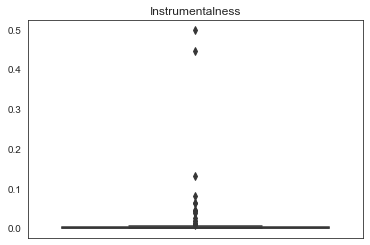

In [13]:
simple_boxplot(tracks, 'instrumentalness', 'Instrumentalness')
plt.show()

Pretty much every song on my playlist has vocals, so it isn't surprising that the instrumentalness scores are very low. Some songs are largely instrumental with some sampled vocals, so those are likely the ones that score on the higher end. However, as with liveness, I don't view this as a reason to limit playlist songs to only those with vocals. I grew up listening to lots of jazz and classical music, so I have come to enjoy lots of music that is entirely instrumental. Most popular music today has vocals anyway, so it seems likely that the data just reflects this trend and not any kind of preference on my part.

### 3. Duration

Next, let's look at duration_ms. This is simply the duration of each track in milliseconds [1]. Let's first convert this to minutes so it is easier to interpret.

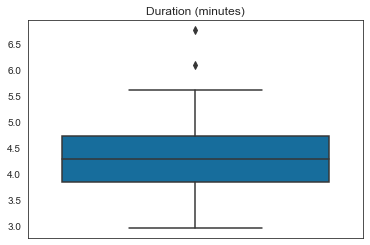

In [14]:
tracks['duration_mins'] = tracks['duration_ms'].values/60000
simple_boxplot(tracks, 'duration_mins', 'Duration (minutes)')
plt.show()

The median track is around 4.5 minutes, though track lengths vary from less than 3 minutes to almost 7 minutes. Again, I don't view track length as a limiting factor for the playlist. I like to run for long distances and am happy to listen to a 20 minute song if it is interesting and energetic enough.

### 4. Time Signature

Let's look at time signature. Spotify has the following to say about time signature [1]:

* <b>time_signature:</b> An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Let's exclude any time signatures that are out of the 3 to 7 range.

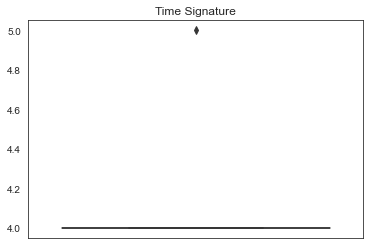

In [15]:
time_in_range = tracks[(tracks['time_signature'] >= 3) & (tracks['time_signature'] <= 7)]
simple_boxplot(time_in_range, 'time_signature', 'Time Signature')
plt.show()

Not surprisingly, almost every song on my list is in 4, as most popular music is today. I am not necessarily opposed to listening to songs that aren't in 4, but it certainly feels easier to run to music with an even time signature. Thus, we will limit our search to songs that are just in 4.

### 5. Loudness

Next, let's look at loudness. The Spotify documentation [1] has the following to say about loudness:

* <b>Loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

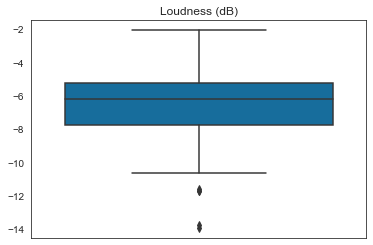

In [16]:
simple_boxplot(tracks, 'loudness', 'Loudness (dB)')
plt.show()

It's a bit difficult to wrap my head around the concept of loudness because Spotify normalizes the actual volume of each track. However, the data clearly shows that I listen to songs with a relatively narrow range of loudness, from -7.74 at the 25th percentile to -5.27 at the 75th percentile. On the one hand, this is certainly interesting. On the other hand, it seems like it might unnecessarily restrict the choice of songs. As a compromise, let's look for songs that cover the full range of loudness in the tracks on my current playlist, from -13.95 to -2.08.

### 6. Tempo

Let's look at the tempo of songs that I listen to while running. Spotify says the following about tempo [1]:

* <b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

I specifically target songs that have a BPM of about 180 or 90 because I like to run at about 180 steps per minute. So, to visualize this data, let's split the songs into two groups and visualize each group.

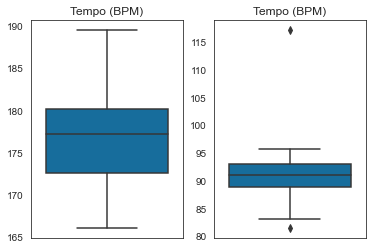

In [17]:
tracks['tempo_slow'] = 0
tracks.loc[tracks['tempo'] < 135, 'tempo_slow'] = 1

fig, (ax0, ax1) = plt.subplots(ncols=2)
simple_boxplot(tracks[tracks['tempo_slow'] == 0], 'tempo', 'Tempo (BPM)', ax=ax0)
simple_boxplot(tracks[tracks['tempo_slow'] == 1], 'tempo', 'Tempo (BPM)', ax=ax1)
plt.show()

I tend to get songs pretty close to the correct tempo, but there is definitely some variation. To keep things simple and close to 90 or 180, we can target songs with tempos from 87.5 to 92.5 or 175 to 185.

### 7. Track Popularity

Finally, let's look at track popularity. From the Spotify documentation [2]:

* <b>popularity:</b> The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

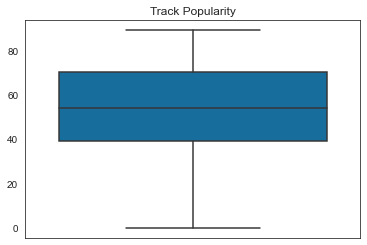

In [18]:
simple_boxplot(tracks, 'track_pop', 'Track Popularity')

The tracks on my list span a wide range of popularity levels, from about 0 to almost 90. What's interesting is that the popularity distribution isn't more skewed. One would think that the distribution would skew more towards the higher end simply because more popular tracks are more likely to be listened to, but the median track popularity is only 54. As with some of the other measures above, I wouldn't necessarily limit songs on my playlist simply because they are outside of a given popularity range, but it is still interesting to look at the data.

## IV. Conclusion

This analysis revealed some interesting information about the music I listen to while running that might help choose more songs to listen to. We came up with a list of genres and artists to look for in the database. We also found out that I like to listen to music with specific audio features, and we found ranges for these values that might help limit our search:

* Danceability >= 0.52
* Energy >= 0.61
* Speechiness <= 0.26
* Acousticness <= 0.20
* Valence >= 0.39
* Loudness >= -13.95 and <= -2.08
* Time signature = 4
* Tempo >= 87.5 and <= 92.5 OR >= 175 and <= 185

Next, we will use these ranges to populate a new playlist of songs.

## V. References

1. 'Get Track's Audio Features'. Spotify for Developers: Web API Reference. https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features.
2. 'Get Track'. Spotify for Developers: Web API Reference. https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track.